In [4]:
import kagglehub
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

file_path = "data/microdados_enem_2016_coma.csv"

cols = [
    "NU_INSCRICAO", "SG_UF_RESIDENCIA",
    "NU_IDADE", "TP_SEXO", "TP_COR_RACA",
    "TP_ESCOLA", "TP_DEPENDENCIA_ADM_ESC",
    "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO",
    "Q001", "Q002", "Q006"
]

chunks = []
chunksize = 100_000

for chunk in pd.read_csv(
    file_path,
    sep=",",
    encoding="latin1",
    on_bad_lines="skip",
    low_memory=False,
    chunksize=chunksize
):
    available_cols = [c for c in cols if c in chunk.columns]
    chunk = chunk[available_cols]
    chunks.append(chunk)
    print(f"Chunk lido: {len(chunk)} linhas")

df = pd.concat(chunks, ignore_index=True)

print("Dados carregados:", df.shape)
df = df.dropna(subset=["NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_CH"])
print("Shape pós-limpeza:", df.shape)

df.to_csv("data/enem2016_socioeconomico.csv", index=False, encoding="utf-8")

print("✅ Arquivo salvo: enem2016_socioeconomico.csv")


Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 

In [5]:
df = pd.read_csv("data/enem2016_socioeconomico.csv")
print("Colunas disponíveis:", df.columns.tolist())


Colunas disponíveis: ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006']


In [6]:
# --- transformar Q001, Q002, Q006 em numéricas (ordinais) ---
ord_cols = ["Q001", "Q002", "Q006"]
mappings = {}

for col in ord_cols:
    if col in df.columns:
        categorias = sorted(df[col].dropna().unique())
        mapping = {cat: i + 1 for i, cat in enumerate(categorias)}
        df[col + "_num"] = df[col].map(mapping)
        mappings[col] = mapping

# --- transformar TP_ESCOLA em numérica para fechar as 10 variáveis ---
if "TP_ESCOLA" in df.columns:
    df["TP_ESCOLA_num"] = df["TP_ESCOLA"].astype("category").cat.codes

mappings


{'Q001': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8},
 'Q002': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8},
 'Q006': {'A': 1,
  'B': 2,
  'C': 3,
  'D': 4,
  'E': 5,
  'F': 6,
  'G': 7,
  'H': 8,
  'I': 9,
  'J': 10,
  'K': 11,
  'L': 12,
  'M': 13,
  'N': 14,
  'O': 15,
  'P': 16,
  'Q': 17}}

In [7]:
num_vars = [
    "NU_IDADE",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
    "Q001_num",
    "Q002_num",
    "Q006_num",
    "TP_ESCOLA_num",
]

print("Variáveis numéricas usadas:", num_vars)


Variáveis numéricas usadas: ['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001_num', 'Q002_num', 'Q006_num', 'TP_ESCOLA_num']


In [8]:
def resumo_univariado(df, cols):
    linhas = []
    for col in cols:
        serie = df[col].dropna()
        moda = serie.mode()
        moda_val = moda.iloc[0] if not moda.empty else np.nan

        linhas.append({
            "variavel": col,
            "n": len(serie),
            "media": serie.mean(),
            "mediana": serie.median(),
            "moda": moda_val,
            "desvio_padrao": serie.std(),
            "p25": serie.quantile(0.25),
            "p50": serie.quantile(0.50),
            "p75": serie.quantile(0.75),
        })
    return pd.DataFrame(linhas)

resumo = resumo_univariado(df, num_vars)
resumo.round(2)


,variavel,n,media,mediana,moda,desvio_padrao,p25,p50,p75
0,NU_IDADE,5814885,21.80,19.0,17.0,7.36,17.0,19.0,23.0
1,NU_NOTA_CN,5814955,478.41,463.8,441.3,72.69,422.5,463.8,523.7
2,NU_NOTA_CH,5814955,535.35,538.2,549.9,74.13,485.7,538.2,587.1
3,NU_NOTA_LC,5814955,521.06,525.2,536.8,68.65,474.4,525.2,569.4
4,NU_NOTA_MT,5814955,490.25,468.2,423.5,103.19,412.9,468.2,549.2
5,NU_NOTA_REDACAO,5814955,530.37,540.0,560.0,153.75,440.0,540.0,600.0
6,Q001_num,5814952,4.10,4.0,5.0,1.96,2.0,4.0,5.0
7,Q002_num,5814952,4.22,4.0,5.0,1.74,3.0,4.0,5.0
8,Q006_num,5814952,4.52,3.0,2.0,3.18,2.0,3.0,6.0
9,TP_ESCOLA_num,5814955,0.31,0.0,0.0,0.56,0.0,0.0,1.0


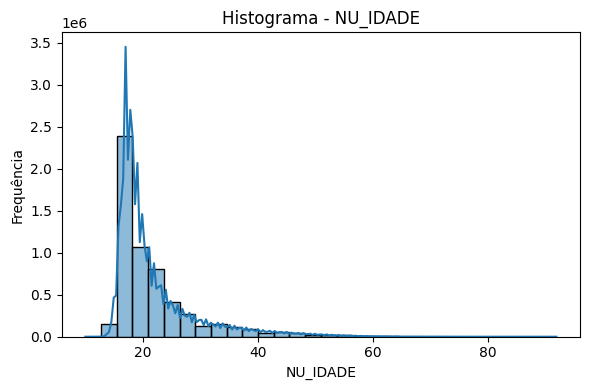

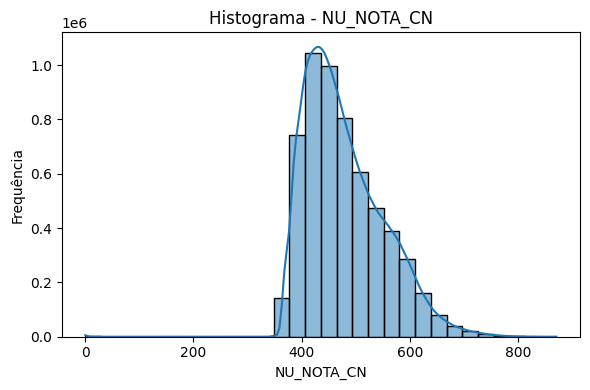

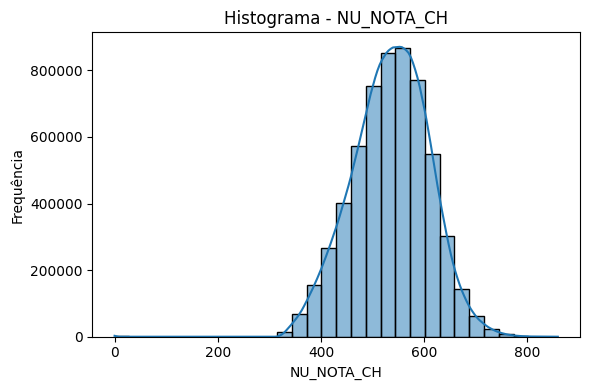

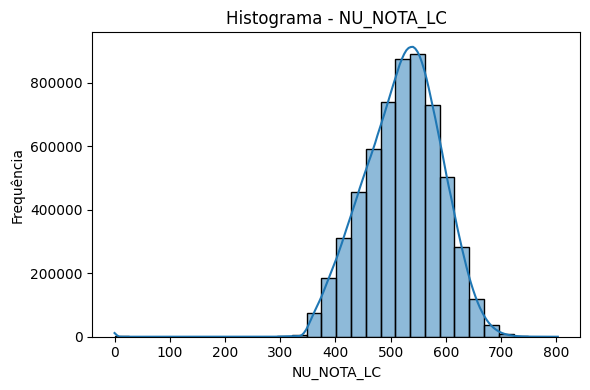

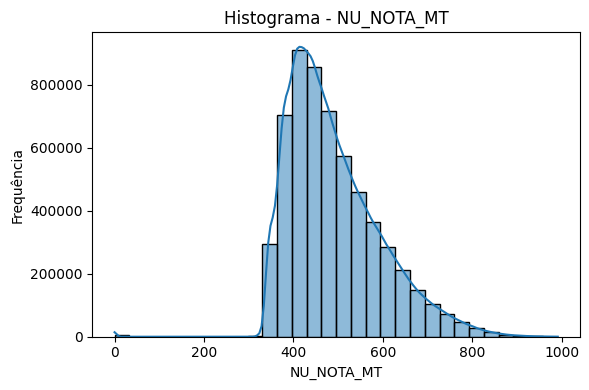

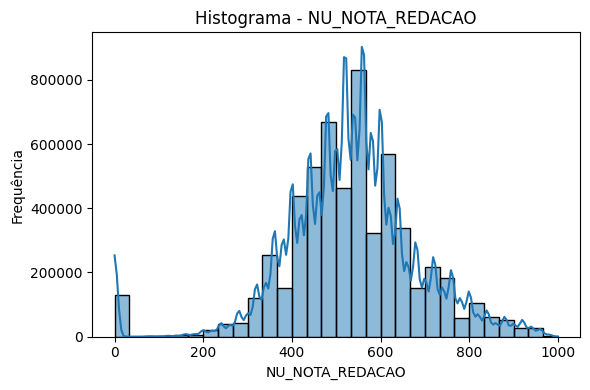

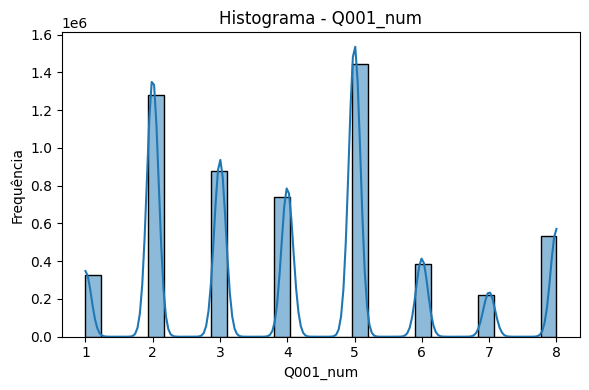

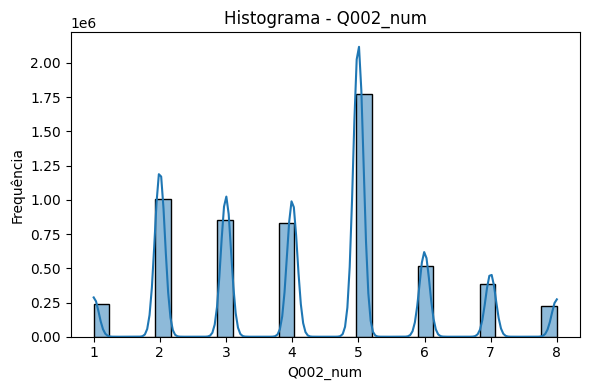

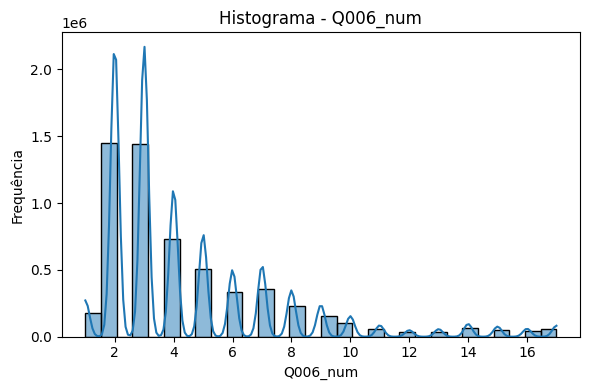

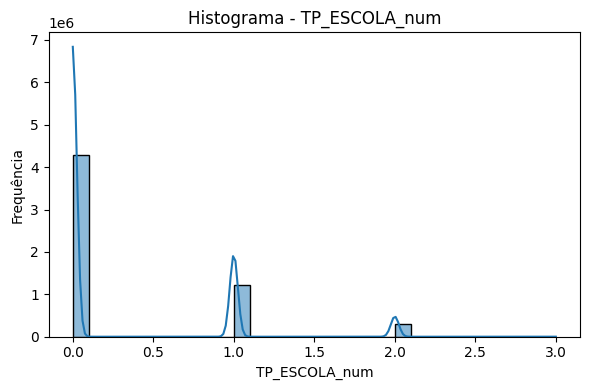

In [9]:
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Histograma - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


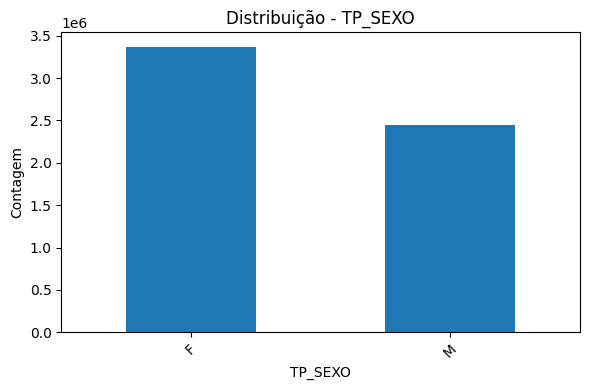

TP_SEXO
F    0.58
M    0.42
Name: proportion, dtype: float64

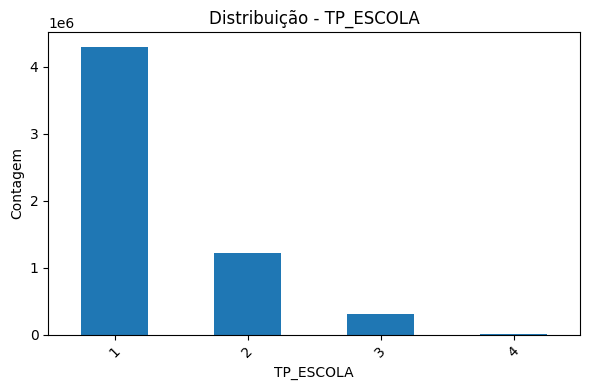

TP_ESCOLA
1    0.739
2    0.209
3    0.052
4    0.000
Name: proportion, dtype: float64

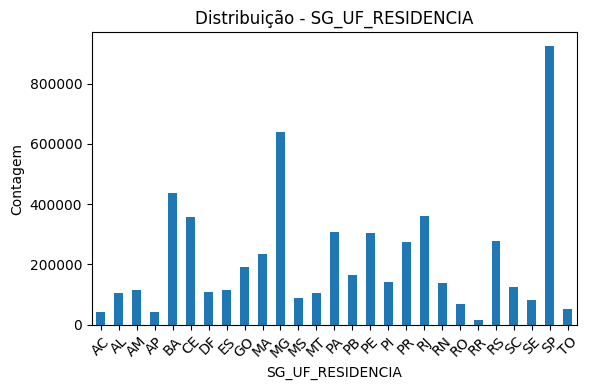

SG_UF_RESIDENCIA
SP    0.159
MG    0.110
BA    0.075
RJ    0.062
CE    0.062
PA    0.053
PE    0.052
RS    0.048
PR    0.047
MA    0.040
GO    0.033
PB    0.029
PI    0.024
RN    0.024
SC    0.022
AM    0.020
ES    0.020
DF    0.019
AL    0.018
MT    0.018
MS    0.015
SE    0.014
RO    0.012
TO    0.009
AC    0.007
AP    0.007
RR    0.003
Name: proportion, dtype: float64

In [10]:
cat_cols = ["TP_SEXO", "TP_ESCOLA", "SG_UF_RESIDENCIA"]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().sort_index().plot(kind="bar")
        plt.title(f"Distribuição - {col}")
        plt.xlabel(col)
        plt.ylabel("Contagem")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        display(df[col].value_counts(normalize=True).round(3))
